# Atividade Basica

 π via Monte Carlo (etapa 1) Considere um círculo de raio r = 1 inscrito em um quadrado de lado 2 r = 2 . A área do círculo é π r 2 = π . A área do quadrado é 4 . A razão entre a área do círculo e a área do quadrado é π / 4 . Se gerarmos N pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será π / 4 . Assim, podemos estimar π como 4 vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados N para ver como o resultado muda. Implemente na forma de uma função com assinatura:

In [179]:
import numpy as np
def pi_monte_carlo(N):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2
    quadrado = circulo = 0

    #calcula o numero de valores dentro do circulo
    for i in range(N):

        if (x[i] + y[i]) <= 1:
            circulo += 1

    #estima o valor de pi
    estimativa_pi = circulo*4/N

    return estimativa_pi

print(pi_monte_carlo(1000000))

3.139612




  Mapa logístico, caos e fractais (etapa 1) O mapa logístico é definido pela equação x n + 1 = r x n ( 1 − x n ) , onde x n é a população (normalizada entre 0 e 1) no instante de tempo discreto n , e r é o parâmetro de crescimento. Para um dado valor de r , a população x n pode convergir para um valor fixo, oscilar entre dois valores, ou oscilar entre mais de dois valores, ou simplesmente enlouquecer e parecer aleatório.

  a) Implemente uma função mapa_logistico(r, x0, N) que recebe o parâmetro de crescimento r, a condição inicial x0 (i.e. x 0 para n = 0 ), e o número de iterações N, e retorna uma lista com os valores de x n para n = 0 , 1 , 2 , … , N .

  b) Faça gráficos de x n vs n (de 0 a 1000 pelo menos) para r = 2 , 3.3 , 3.5 , 3.9 , sempre iniciando de x 0 = 1 / 2 . Talvez seja melhor usar um gráfico de linhas (plt.plot) para r = 2 , e um gráfico de pontos (plt.scatter) para os outros valores de r . O que você observa?


/home/adrian/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


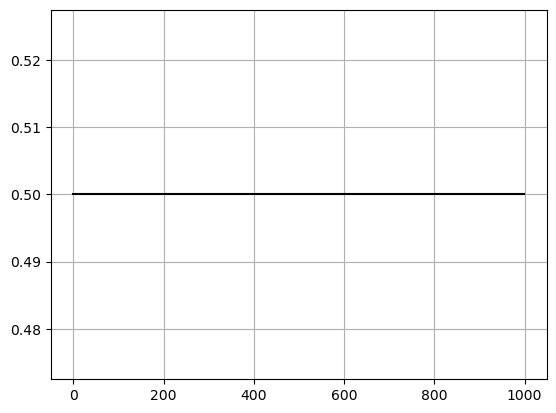

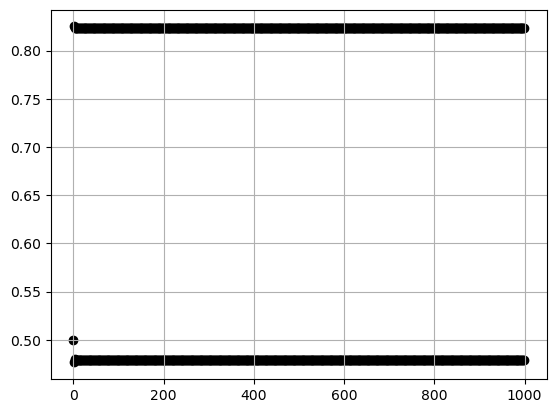

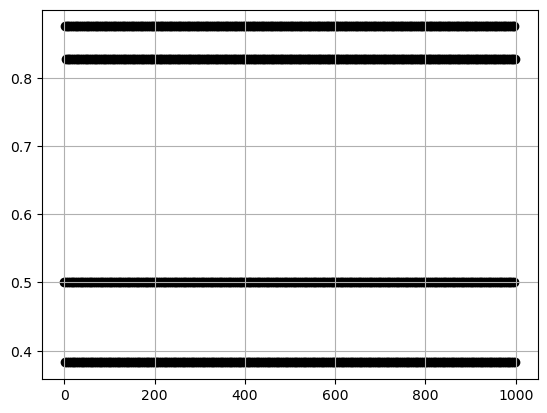

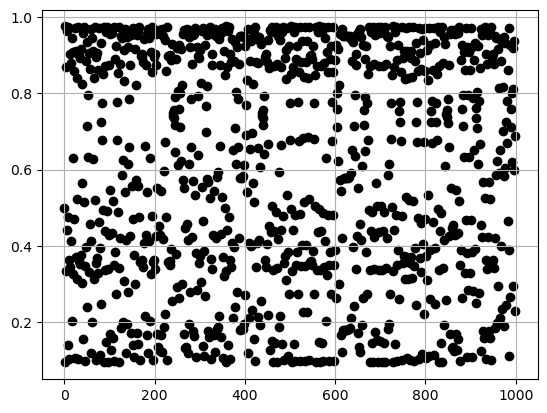

In [180]:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r,x0, N):
    '''
    Calcula e retorna o mapa logistico de uma pupulação de com parametro de crescimento r em um tempo discreto N.

    Argumentos
    ----------
    r : float
        Taxa de crecimento
    x0 : float
        Valor inicial de x
    n : int
        O número de passos.
    Retorna
    -------
    x,y : array , array
        O .
    '''

    x = []
    t = (np.arange(N,dtype=float))
    x.append(x0)

    for i in range(N-1):
        x.append(r*x[i]*(1-x[i]))

    return  x,t

plt.figure()
y,x = mapa_logistico(2,0.5,1000)
plt.plot(x,y,color='black')
plt.grid()

plt.figure()
y,x = mapa_logistico(3.3,0.5,1000)
plt.scatter(x,y,color='black')
plt.grid()

plt.figure()
y,x = mapa_logistico(3.5,0.5,1000)
plt.scatter(x,y,color='black')
plt.grid()

plt.figure()
y,x = mapa_logistico(3.9,0.5,1000)
plt.scatter(x,y,color='black')
plt.grid()



# Atividade intermediaria

In [181]:
import numpy as np
def pi_monte_carlo2(N,retorna_pontos = False):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.
    retorna_pontos : bool
        Se True retorna o numero de pontos dentro e fora, se False retorna somente o valor aproximado de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    int
        O numero de pontos dentro
    int
        O numero de pontos fora
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2

    #calcula o numero de valores dentro do circulo


    #estima o valor de pi
    dentro = 0
    if retorna_pontos:

        #calcula o numero de valores dentro e fora do circulo
        for i in range(N):
            if (x[i] + y[i]) <= 1:
                dentro += 1

        #estima o valor de pi
        estimativa_pi = dentro*4/N

        #numero de pontos fora
        fora = N - dentro

        return estimativa_pi, dentro , fora

    else:
        #calcula o numero de valores dentro do circulo
        for i in range(N):
            if (x[i] + y[i]) <= 1:
                dentro += 1

        #estima o valor de pi
        estimativa_pi = dentro*4/N
        return estimativa_pi

print(pi_monte_carlo2(100000))
print(pi_monte_carlo2(1000000,True))

3.14484
(3.14244, 785610, 214390)


In [ ]:
import numpy as np
def pi_monte_carlo3(N,retorna_pontos = False):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2
    r= (x+y)/2
    
    fora = sum(np.round(r))
    dentro = N-fora
    #calcula o numero de valores dentro do circulo


    #estima o valor de pi
    estimativa_pi = dentro*4/N
    if retorna_pontos:

        dentro2 = np.round(r) #== 0
        return estimativa_pi, dentro2 , x,y

    else:
  
        return estimativa_pi
    
pi , dentro ,x,y=pi_monte_carlo3(1000,True)

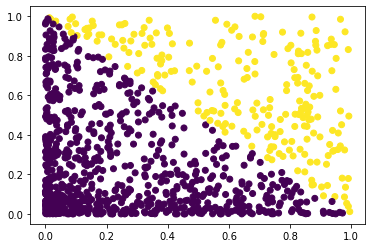

In [45]:
plt.gca
plt.scatter(x,y, c = dentro )


2000


C:\Users\gfm050\AppData\Local\Temp\ipykernel_3484\538638813.py:34: RuntimeWarning: overflow encountered in double_scalars
  a.append(r[j]*a[i]*(1-a[i]))


2000 4.099 1000
2000000 2000000


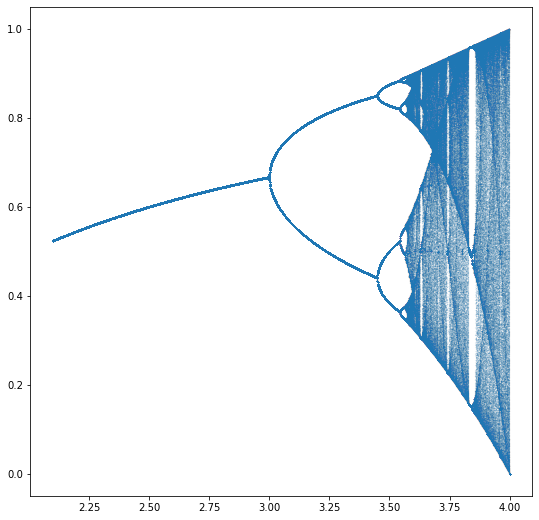

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def mapa_logistico2(x0, N,M):
    '''
      Calcula e retorna o mapa logistico de uma pupulação de com parametro de crescimento r em um tempo discreto N.

    Argumentos
    ----------
    r : float
        Taxa de crecimento
    x0 : float
        Valor inicial de x
    N : int
        O número de passos.
    M : int
        O numero de passos imprimidos.
    Retorna
    -------
    0
    '''
    y = []
    x = []
    r = 0.001*np.arange(2000,dtype=float)+2.1
    t = (np.arange(N,dtype=float))
   
    for j in range(len(r)):

      y.extend(r[j]*np.ones(M))
      a = [x0]
      for i in range(N-1):
       
        a.append(r[j]*a[i]*(1-a[i]))
      
      x.extend(a[-M:]) 
       

    return x,y

plt.figure(figsize=(9,9))
x,y = mapa_logistico2(0.5,2000,1000)

plt.scatter(y,x , s=0.001 )


#Atividade avançada

In [186]:
import numpy as np
def pi_monte_carlo3(N):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2
    r= (x+y)/2
    fora = sum(np.round(r))
    dentro = N-fora
    #calcula o numero de valores dentro do circulo

    #estima o valor de pi
    estimativa_pi = dentro*4/N

    return estimativa_pi

In [5]:
%timeit pi_monte_carlo3(100000)

58.2 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit pi_monte_carlo(100000)

NameError: name 'pi_monte_carlo' is not defined